<a href="https://colab.research.google.com/github/AkindeKadjo/food_sales_predictions/blob/main/00_Final_version_Sales_pred4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Coding Dojo/01 Week 1: Python/sales_predictions.csv'

In [2]:
#Checking to have an over view of the dataframe
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

How many rows and columns?

In [3]:
df.shape

(8523, 12)

What are the datatypes of each variable?

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Are there duplicates? If so, drop any duplicates

In [5]:
df.duplicated().sum()
df = df.drop_duplicates()

Identify missing values

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)

In [7]:
# I do not believe that the item weight nor the outlet size is a predictor of wether an item will sell, so I'll go ahead and drop these two columns
df.drop(columns = ['Item_Weight','Outlet_Size'], inplace=True)

Confirm that there are no missing values after addressing them.

In [8]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [9]:
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [10]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [14]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [15]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


#Statistical Analysis

The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

## Histogram to view the distributions of various features in our dataset.

The histograms below give us an idea of the distribution of item outlet sales, item MRPs and item visibilities

From the results below it seems as thought: items that bring in a lot of sales are a lot less than items that don't. The item MRP is somehow evenly distributes with a mean of 140. It also seems that a lot of items tends to have lower visibility


Text(0, 0.5, 'Counts')

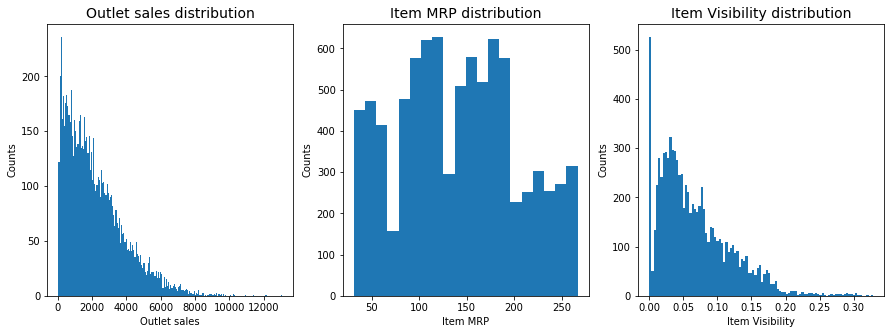

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5));
axes[0].hist(df['Item_Outlet_Sales'], bins = 200)
axes[0].set_title('Outlet sales distribution', fontsize = 14)
axes[0].set_xlabel('Outlet sales')
axes[0].set_ylabel('Counts')

axes[1].hist(df['Item_MRP'], bins = 20)
axes[1].set_title('Item MRP distribution', fontsize = 14)
axes[1].set_xlabel('Item MRP')
axes[1].set_ylabel('Counts')

axes[2].hist(df['Item_Visibility'], bins = 100)
axes[2].set_title('Item Visibility distribution', fontsize = 14)
axes[2].set_xlabel('Item Visibility')
axes[2].set_ylabel('Counts')

## Boxplot to view statistical summaries of various features in our dataset.

Let's look at the impact of **Outlet type** on: Sales, MRP and Visibility

From the results below it seems that when it comes to Outlet sales, Supermaket type 3 overperforms Supermaket type 1 and 2 with Grocery stores coming in last. The item MRP doesn't change as a function of the market type, which is understandable as the marginal revenue wouldn't change unless the item price was changing per store. Grocery store stores however ranked highest in visibility with the other Supermaket type ranking about the same, this could be due to the fact that Grocery stores are most accessible? 

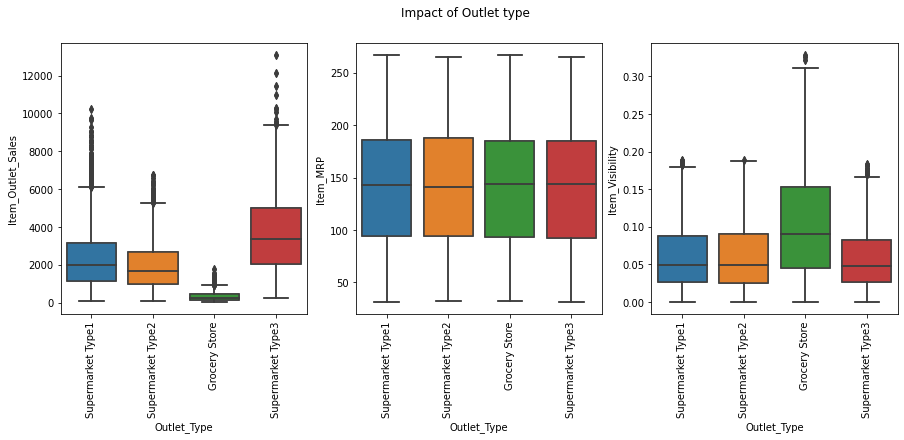

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of Outlet type')
sns.boxplot(ax=axes[0], data=df, x='Outlet_Type', y='Item_Outlet_Sales')
sns.boxplot(ax=axes[1], data=df, x='Outlet_Type', y='Item_MRP')
sns.boxplot(ax=axes[2], data=df, x='Outlet_Type', y='Item_Visibility')
ax1 = sns.boxplot(ax=axes[0], data=df, x='Outlet_Type', y='Item_Outlet_Sales')
ax2 = sns.boxplot(ax=axes[1], data=df, x='Outlet_Type', y='Item_MRP')
ax3 = sns.boxplot(ax=axes[2], data=df, x='Outlet_Type', y='Item_Visibility')
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)

Now let's look at the impact of **Outlet location** on: Sales, MRP and Visibility

Based on the figure below, Tier 2 seems to have the highest sale average whereas Tier 3 has much higher outliers. As stated above we don't expect much change from the MRP. On the other hand, Tier 1 seems to have the highest  visibility followed by Tier 3 then Tier 2.

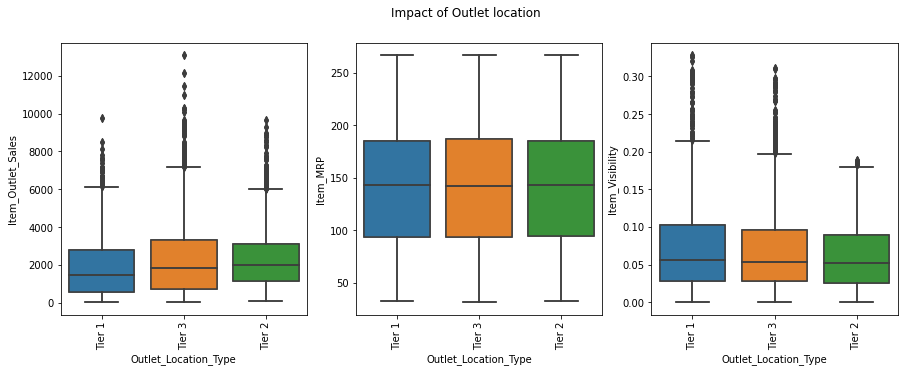

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of Outlet location')
sns.boxplot(ax=axes[0], data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
sns.boxplot(ax=axes[1], data=df, x='Outlet_Location_Type', y='Item_MRP')
sns.boxplot(ax=axes[2], data=df, x='Outlet_Location_Type', y='Item_Visibility')
ax1 = sns.boxplot(ax=axes[0], data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
ax2 = sns.boxplot(ax=axes[1], data=df, x='Outlet_Location_Type', y='Item_MRP')
ax3 = sns.boxplot(ax=axes[2], data=df, x='Outlet_Location_Type', y='Item_Visibility')
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)

Now let's look at the impact of **Item type** on: Sales, MRP and Visibility

There is a lot of information to gather from the plots below, but what stands out is that seafood, snack foods and household items are among the higher sellers, with household having understandably the highest outliers. When it comes to the MRP, the highest turns out to be Starchy food while the lowest is baking goods. For item visibility, Breakfast items have the highest average visibility.

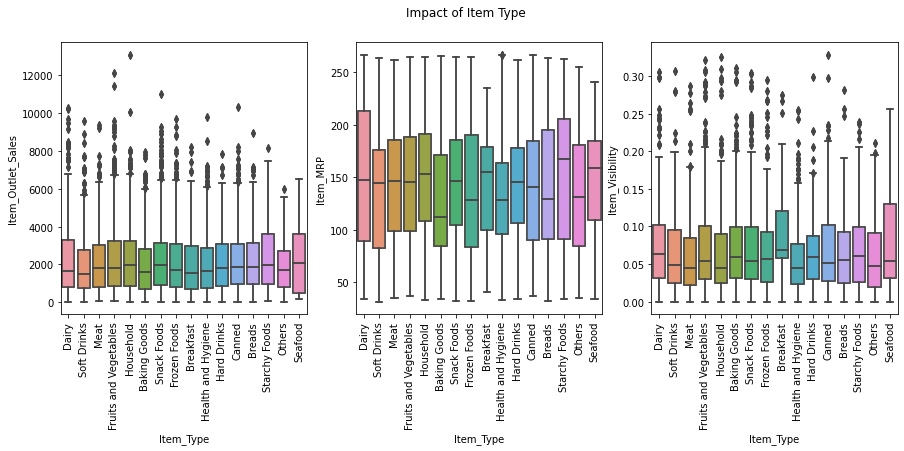

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of Item Type')
sns.boxplot(ax=axes[0], data=df, x='Item_Type', y='Item_Outlet_Sales')
sns.boxplot(ax=axes[1], data=df, x='Item_Type', y='Item_MRP')
sns.boxplot(ax=axes[2], data=df, x='Item_Type', y='Item_Visibility')
ax1 = sns.boxplot(ax=axes[0], data=df, x='Item_Type', y='Item_Outlet_Sales')
ax2 = sns.boxplot(ax=axes[1], data=df, x='Item_Type', y='Item_MRP')
ax3 = sns.boxplot(ax=axes[2], data=df, x='Item_Type', y='Item_Visibility')
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)

Finally, let's look at the impact of **Fat Content** on: Sales, MRP and Visibility

From the plots below, it seems that there is not much difference when it comes to fat content on the outlet sales and the MRP. For item visibility, the regular ones have a slightly higher visibility.

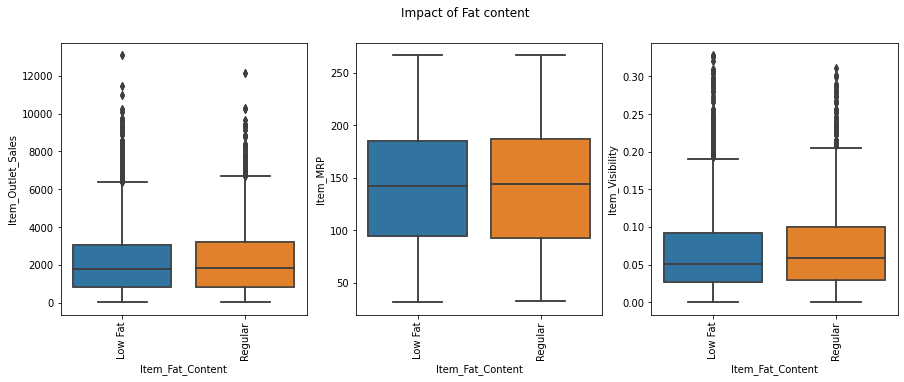

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Impact of Fat content')
sns.boxplot(ax=axes[0], data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
sns.boxplot(ax=axes[1], data=df, x='Item_Fat_Content', y='Item_MRP')
sns.boxplot(ax=axes[2], data=df, x='Item_Fat_Content', y='Item_Visibility')
ax1 = sns.boxplot(ax=axes[0], data=df, x='Item_Fat_Content', y='Item_Outlet_Sales')
ax2 = sns.boxplot(ax=axes[1], data=df, x='Item_Fat_Content', y='Item_MRP')
ax3 = sns.boxplot(ax=axes[2], data=df, x='Item_Fat_Content', y='Item_Visibility')
ax1.tick_params(axis='x', labelrotation=90)
ax2.tick_params(axis='x', labelrotation=90)
ax3.tick_params(axis='x', labelrotation=90)

##Heatmap of the correlation between features.

 We can deduce that there is a positive corelation between the item MRP and the Item Outlet sales. Not much can be said for the rest of the other categories.

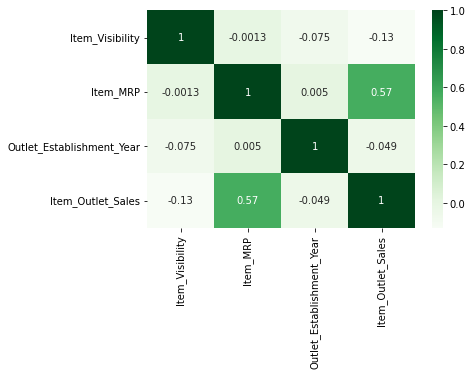

In [21]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot =True)